Download packages

In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
import os
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
random.seed(8)

Create new feature names to take the mean and std across epochs pr person

In [3]:
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]
print(mean_list)

['Delta_mean', 'Delta_N_mean', 'Theta_mean', 'Theta_N_mean', 'Alpha_mean', 'Alpha_N_mean', 'Beta_mean', 'Beta_N_mean', 'Gamma_mean', 'Gamma_N_mean', 'SE_mean', 'MSF_mean', 'Sef90_mean', 'Sef95_mean', 'PE_mean', 'wSMI_mean', 'Kolmogorov_mean', 'MeanRR_mean', 'StdRR_mean', 'MeanHR_mean', 'StdHR_mean', 'MinHR_mean', 'MaxHR_mean']


Take the mean and std across features and create dataframes

In [4]:
path ='CSV_inspected_features/'
folder = os.fsencode(path)
renamed_markers_list = ['No.', 'Event', 'Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]

r_data = []
m_data = []
f_data = []

for file in os.listdir(folder):
    filename = os.fsdecode(file)
    fname = path + filename
    data = pd.read_csv(fname)
    data.columns = renamed_markers_list
    R_indicesToKeep = data['Event'] == 'R'
    df_r = data.loc[R_indicesToKeep]

    M_indicesToKeep = data['Event'] == 'M'
    df_m = data.loc[M_indicesToKeep]

    F_indicesToKeep = data['Event'] == 'F'
    df_f = data.loc[F_indicesToKeep]
   

    r_mean = pd.DataFrame(df_r[m_list].mean(axis=0)).transpose()
    m_mean = pd.DataFrame(df_m[m_list].mean(axis=0)).transpose()
    f_mean = pd.DataFrame(df_f[m_list].mean(axis=0)).transpose()

    r_mean.columns = mean_list
    m_mean.columns = mean_list
    f_mean.columns = mean_list

    r_std = pd.DataFrame(df_r[m_list].std(axis=0)).transpose()
    m_std = pd.DataFrame(df_m[m_list].std(axis=0)).transpose()
    f_std = pd.DataFrame(df_f[m_list].std(axis=0)).transpose()
        
    r_std.columns = std_list
    m_std.columns = std_list
    f_std.columns = std_list
    
    rest = pd.concat([r_mean,r_std],axis=1).to_numpy()
    med = pd.concat([m_mean,m_std],axis=1).to_numpy()
    fam = pd.concat([f_mean,f_std],axis=1).to_numpy()

    r_data.append(rest[0])
    m_data.append(med[0])
    f_data.append(fam[0])


In [5]:
len(r_data)+len(f_data)

56

Get random indexes to chose which files to take m-r, f-r or r-m, r-f

In [6]:
indexes = random.sample(range(0,len(r_data)),int(len(r_data)/2))
print(indexes)

[7, 11, 12, 4, 6, 22, 1, 2, 24, 27, 16, 23, 25, 10]


Take the differences and concatenate data

In [7]:
X1 = [r_data[i] - f_data[i] for i in indexes] + [r_data[i] - m_data[i] for i in indexes]
X2 = [f_data[i] - r_data[i] for i in range(0, len(r_data)) if i not in indexes] + [m_data[i] - r_data[i] for i in range(0, len(r_data)) if i not in indexes]
X = X1 + X2
X = sklearn.preprocessing.StandardScaler().fit(X).transform(X)
print(X.shape)
print(X)

(56, 50)
[[ 0.54530005 -0.51372439  0.12388774 ...  0.3796256   0.55485447
  -0.3259563 ]
 [-1.18432203 -1.17695759 -0.40502527 ...  0.30856281 -1.72005909
  -0.32016677]
 [-0.72125903 -0.04491807 -1.24270698 ...  0.68308873 -1.89132886
   0.16588879]
 ...
 [-0.43916802 -0.87243084 -0.22317798 ...  0.37088052  1.12400698
  -1.13159971]
 [-0.76270433 -0.03819559 -1.85248172 ... -0.42107058  1.41583118
  -0.16275082]
 [ 0.27891349  0.95821968  0.20527025 ... -0.06722438  0.40684049
  -0.21310524]]


In [8]:
n_components = 6
pca = sklearn.decomposition.PCA(n_components=n_components)
X = pca.fit_transform(X)
components = pca.components_

In [22]:
pca.explained_variance_ratio_

array([0.16227968, 0.13011178, 0.10655607, 0.07607866, 0.06491443,
       0.05323613])

In [9]:
print(X.shape)

(56, 6)


Create labels

In [10]:
#X = r_data + m_data + f_data
y = np.array(['rf']*int(len(indexes))+['rm']*int(len(indexes))+['fr']*int(len(r_data)-len(indexes))+['mr']*int(len(r_data)-len(indexes)))
print(y)

['rf' 'rf' 'rf' 'rf' 'rf' 'rf' 'rf' 'rf' 'rf' 'rf' 'rf' 'rf' 'rf' 'rf'
 'rm' 'rm' 'rm' 'rm' 'rm' 'rm' 'rm' 'rm' 'rm' 'rm' 'rm' 'rm' 'rm' 'rm'
 'fr' 'fr' 'fr' 'fr' 'fr' 'fr' 'fr' 'fr' 'fr' 'fr' 'fr' 'fr' 'fr' 'fr'
 'mr' 'mr' 'mr' 'mr' 'mr' 'mr' 'mr' 'mr' 'mr' 'mr' 'mr' 'mr' 'mr' 'mr']


Get evaluation data and training data

In [11]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for i, (train_index, eval_index) in enumerate(sss.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={eval_index}")

Fold 0:
  Train: index=[25 28  9  2 34 48 38 49 43 16  4 14 21  7 26 55 44 50 10 27 41  0  3 45
 29 22 11 46 18 24 51 54 53 36 12 20 30 35 37  1  8 17 40 33]
  Test:  index=[32  5 31 13 23 42 19 47 39 15 52  6]


In [12]:
train_X = np.take(X,train_index,axis=0)
train_y = np.take(y,train_index)
eval_X = np.take(X,eval_index,axis=0)
eval_y = np.take(y,eval_index)
print(train_X.shape, eval_X.shape)
print(train_y)

(44, 6) (12, 6)
['rm' 'fr' 'rf' 'rf' 'fr' 'mr' 'fr' 'mr' 'mr' 'rm' 'rf' 'rm' 'rm' 'rf'
 'rm' 'mr' 'mr' 'mr' 'rf' 'rm' 'fr' 'rf' 'rf' 'mr' 'fr' 'rm' 'rf' 'mr'
 'rm' 'rm' 'mr' 'mr' 'mr' 'fr' 'rf' 'rm' 'fr' 'fr' 'fr' 'rf' 'rf' 'rm'
 'fr' 'fr']


Outer fold

In [13]:
skf = StratifiedKFold(n_splits=2)
outer_test_X = []
outer_test_y = []
outer_train_X = []
outer_train_y = []
for i, (train_index, test_index) in enumerate(skf.split(train_X, train_y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    outer_train_X.append(np.take(train_X,train_index,axis=0))
    outer_train_y.append(np.take(train_y,train_index))
    outer_test_X.append(np.take(train_X,test_index,axis=0))
    outer_test_y.append(np.take(train_y,test_index))

Fold 0:
  Train: index=[17 22 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 24]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 24]
  Test:  index=[17 22 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


In [14]:
outer_train_y

[array(['mr', 'rf', 'mr', 'rm', 'rf', 'mr', 'rm', 'rm', 'mr', 'mr', 'mr',
        'fr', 'rf', 'rm', 'fr', 'fr', 'fr', 'rf', 'rf', 'rm', 'fr', 'fr'],
       dtype='<U2'),
 array(['rm', 'fr', 'rf', 'rf', 'fr', 'mr', 'fr', 'mr', 'mr', 'rm', 'rf',
        'rm', 'rm', 'rf', 'rm', 'mr', 'mr', 'rf', 'rm', 'fr', 'rf', 'fr'],
       dtype='<U2')]

Inner loop, strat kfold

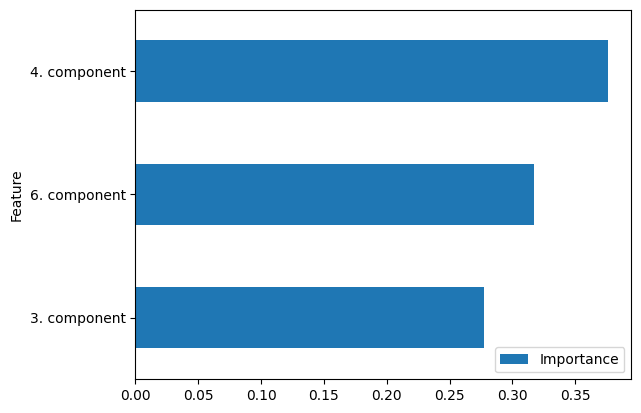

Chosen features:  ['3. component' '4. component' '6. component']
Score:  0.22727272727272727


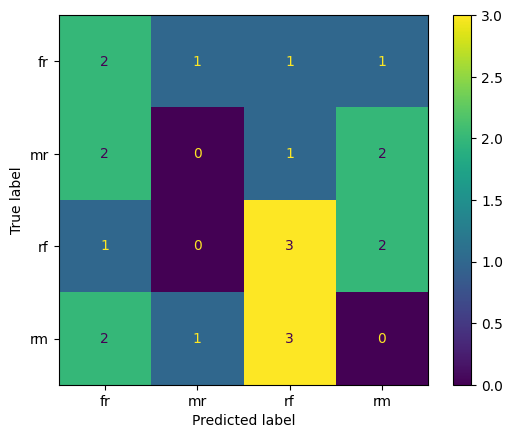

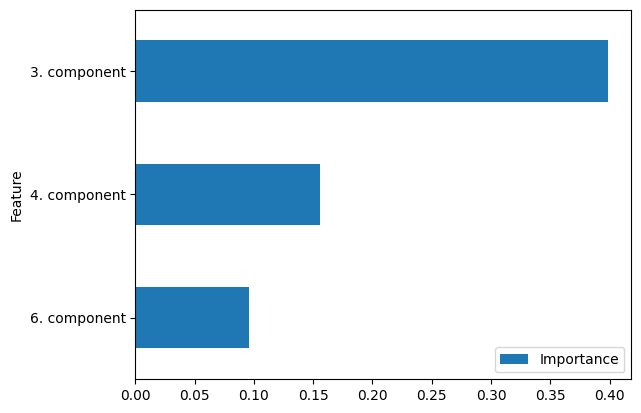

Chosen features:  ['3. component' '4. component' '6. component']
Score:  0.13636363636363635


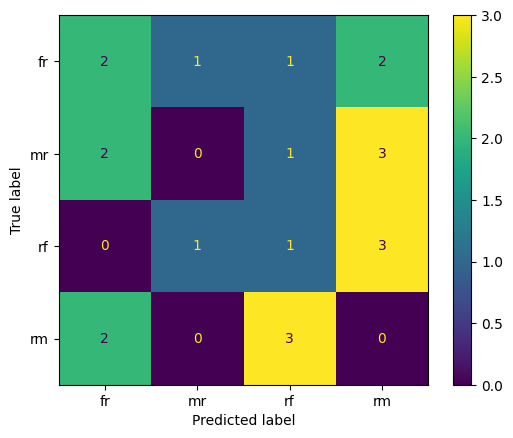

In [15]:
for i in range(len(outer_train_X)):
    train_y = outer_train_y[i]
    train_X = outer_train_X[i]
    #print(train_X.shape,train_X)
    #print(train_y.shape,train_y)
    #skf = StratifiedKFold(n_splits=3)

    lr = LogisticRegression(multi_class='multinomial')
    sfs = SequentialFeatureSelector(lr, cv=3) #cv = number of splits in crossval, automaticly it has stratifies kfold
    sfs.fit(train_X, train_y)
    chosen_features = sfs.get_feature_names_out([str(i) + '. component' for i in range(1,n_components+1)]) #get features
    trans_X = sfs.transform(train_X) #removing unnecessary features
    lr2 = LogisticRegression(multi_class='multinomial')
    lr2.fit(trans_X,train_y) #fitting to all training data
    coefficients = lr2.coef_
    avg_imp = np.mean(np.abs(coefficients),axis=0)
    feature_imp = pd.DataFrame({'Feature': chosen_features, 'Importance': avg_imp}).sort_values('Importance',ascending=True).plot(x='Feature', y='Importance', kind='barh')
    plt.show()
    y_pred = lr2.predict(sfs.transform(outer_test_X[i]))
    sklearn.metrics.ConfusionMatrixDisplay.from_predictions(outer_test_y[i], y_pred)
    score = lr2.score(sfs.transform(outer_test_X[i]),outer_test_y[i]) #mean acc
    print('Chosen features: ',chosen_features)
    print('Score: ', score)

In [17]:
sort1 = np.argsort(abs(np.array(components[2])))[::-1]
sort2 = np.argsort(abs(np.array(components[3])))[::-1]
sort3 = np.argsort(abs(np.array(components[5])))[::-1]
markers_list = mean_list + std_list
print([markers_list[i] for i in sort1])
print([markers_list[i] for i in sort2])
print([markers_list[i] for i in sort3])

['PE_mean', 'wSMI_mean', 'Kolmogorov_mean', 'Delta_N_mean', 'Beta_N_mean', 'Beta_mean', 'Delta_mean', 'Alpha_N_mean', 'Gamma_mean', 'Alpha_mean', 'PE_std', 'Sef95_mean', 'wSMI_std', 'Gamma_N_mean', 'Sef90_mean', 'MinHR_std', 'freq_slope_mean_mean', 'MeanHR_std', 'MeanRR_mean', 'freq_slope_std_std', 'Delta_N_std', 'MeanRR_std', 'MinHR_mean', 'MeanHR_mean', 'SE_mean', 'Theta_N_mean', 'Delta_std', 'StdRR_mean', 'MSF_std', 'Gamma_N_std', 'Kolmogorov_std', 'MSF_mean', 'Theta_N_std', 'Theta_mean', 'Gamma_std', 'Beta_std', 'StdHR_mean', 'StdRR_std', 'Sef95_std', 'MaxHR_mean', 'SE_std', 'freq_slope_std_mean', 'Alpha_N_std', 'Beta_N_std', 'StdHR_std', 'Alpha_std', 'freq_slope_mean_std', 'Sef90_std', 'Theta_std', 'MaxHR_std']
['MaxHR_mean', 'Theta_mean', 'MaxHR_std', 'Delta_mean', 'Sef95_mean', 'Beta_N_mean', 'Beta_N_std', 'StdHR_mean', 'StdHR_std', 'MeanHR_mean', 'Theta_N_std', 'Theta_N_mean', 'Sef90_mean', 'MeanRR_mean', 'MSF_mean', 'PE_std', 'Beta_std', 'Gamma_std', 'Gamma_N_mean', 'SE_mean',

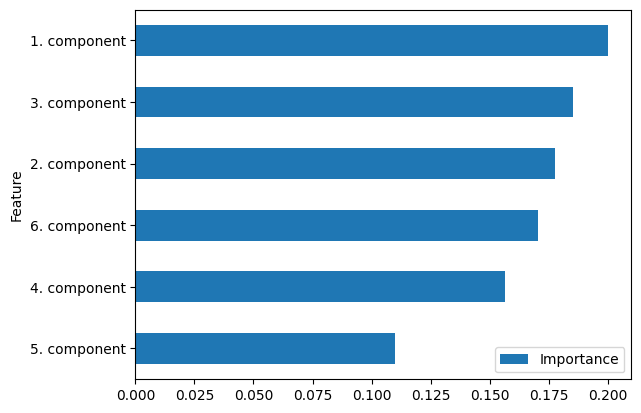

Chosen features:  ['3. component' '4. component' '6. component']
Score:  0.13636363636363635


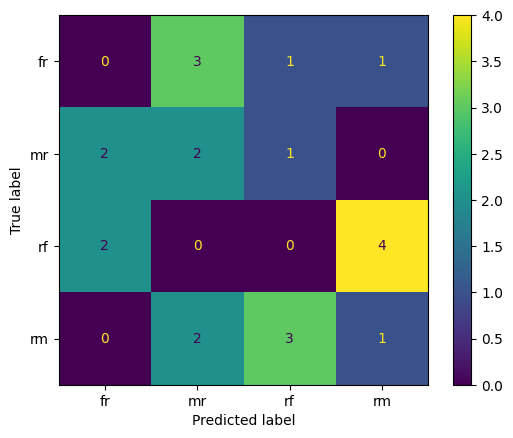

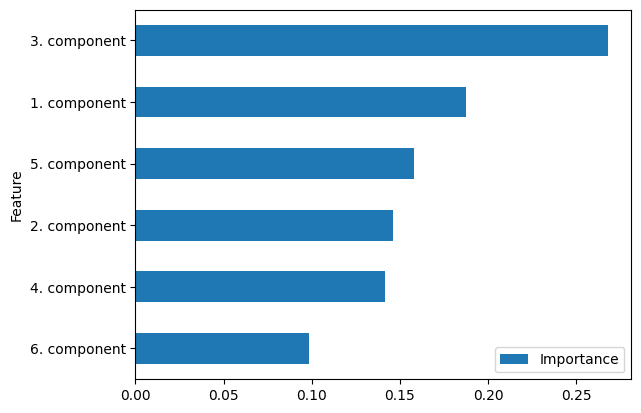

Chosen features:  ['3. component' '4. component' '6. component']
Score:  0.09090909090909091


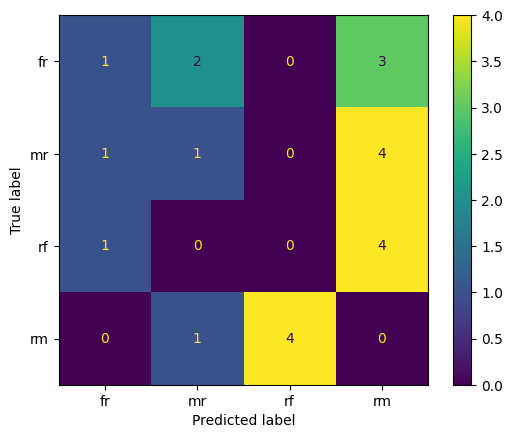

In [19]:
for i in range(len(outer_train_X)):
    train_y = outer_train_y[i]
    train_X = outer_train_X[i]
    #print(train_X.shape,train_X)
    #print(train_y.shape,train_y)
    #skf = StratifiedKFold(n_splits=3)

    lr = RandomForestClassifier(n_estimators=100, max_depth = 2)
    #sfs = SequentialFeatureSelector(lr, cv=3) #cv = number of splits in crossval, automaticly it has stratifies kfold
    #sfs.fit(train_X, train_y)
    #chosen_features = sfs.get_feature_names_out(mean_list+std_list) #get features
    #trans_X = sfs.transform(train_X) #removing unnecessary features
    #lr2 = RandomForestClassifier(n_estimators=10, max_depth = 2)
    
    lr.fit(train_X,train_y) #fitting to all training data
    coefficients = lr.feature_importances_
    feature_imp = pd.DataFrame({'Feature': [str(i) + '. component' for i in range(1,n_components+1)], 'Importance': coefficients}).sort_values('Importance',ascending=True).plot(x='Feature', y='Importance', kind='barh')
    plt.show()
    y_pred = lr.predict(outer_test_X[i])
    sklearn.metrics.ConfusionMatrixDisplay.from_predictions(outer_test_y[i], y_pred)
    score = lr.score(outer_test_X[i],outer_test_y[i]) #mean acc
    print('Chosen features: ',chosen_features)
    print('Score: ', score)